In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/Dimension Reduce/Source

/content/drive/MyDrive/Colab Notebooks/Dimension Reduce/Source


In [4]:
import pandas as pd
import numpy as np

Y_train = pd.read_csv('Y_train.csv', index_col=0)
Y_test = pd.read_csv('Y_test.csv', index_col=0)
Y_val = pd.read_csv('Y_val.csv', index_col=0)

#convert pd 2D to 1D
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()
Y_val = Y_val.values.ravel()

X_train = pd.DataFrame(np.load('X_train.npy'))
X_test = pd.DataFrame(np.load('X_test.npy'))
X_val = pd.DataFrame(np.load('X_val.npy'))

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train =  label_encoder.fit_transform(Y_train)
Y_test  = label_encoder.transform(Y_test)
Y_val   = label_encoder.transform(Y_val)
label_encoder.classes_

xxtr= X_train
xxt = X_test
xt = X_val

# Tìm các giá trị duy nhất trong mảng y_train
unique_values = np.unique(Y_train)
# Tính số lượng mẫu của từng class bằng cách đếm số lượng nhãn của từng class
class_counts = np.bincount(Y_train)
# Tính class weight cho từng class
total_samples = np.sum(class_counts)
class_weights = {}
for i, count in enumerate(class_counts):
    class_weights[i] = total_samples / (len(unique_values) * count)
print("Class weight:", class_weights)

Class weight: {0: 5.635236609464378, 1: 2.717973413594181, 2: 1.1633826102826714, 3: 2.7057578027465667, 4: 1.1142648555828611, 5: 157.50813953488372, 6: 338.6425, 7: 0.09435903866030325, 8: 2.7046772824839014, 9: 6.7762381190595296, 10: 13.964639175257732, 11: 2.6571267439864648, 12: 3.637528112517203, 13: 2.7074478450968145, 14: 8.978094449047225}


# 2F

In [5]:
n_component = 2
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep

import pyplot as plt
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)


program start...
Epoch 1/200
161/163 [============================>.] - ETA: 0s - loss: 2.0767 - accuracy: 0.6846
Epoch 1: val_accuracy improved from -inf to 0.77902, saving model to EdgeIIoT_ica_2.hdf5
163/163 [==============================] - 8s 7ms/step - loss: 2.0725 - accuracy: 0.6855 - val_loss: 0.5998 - val_accuracy: 0.7790
Epoch 2/200
 23/163 [===>..........................] - ETA: 0s - loss: 1.6324 - accuracy: 0.7894

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/163 [============================>.] - ETA: 0s - loss: 1.5484 - accuracy: 0.7900
Epoch 2: val_accuracy improved from 0.77902 to 0.82311, saving model to EdgeIIoT_ica_2.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5478 - accuracy: 0.7901 - val_loss: 0.4788 - val_accuracy: 0.8231
Epoch 3/200
158/163 [============================>.] - ETA: 0s - loss: 1.3732 - accuracy: 0.8112
Epoch 3: val_accuracy did not improve from 0.82311
163/163 [==============================] - 1s 6ms/step - loss: 1.3720 - accuracy: 0.8105 - val_loss: 0.4503 - val_accuracy: 0.7881
Epoch 4/200
160/163 [============================>.] - ETA: 0s - loss: 1.2801 - accuracy: 0.8215
Epoch 4: val_accuracy improved from 0.82311 to 0.87657, saving model to EdgeIIoT_ica_2.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.2794 - accuracy: 0.8218 - val_loss: 0.4035 - val_accuracy: 0.8766
Epoch 5/200
163/163 [==============================] - ETA: 0s - loss: 1.2274 - accuracy: 0.8

ModuleNotFoundError: ignored

In [ ]:
print("Evaluate on test data")
results = model.evaluate(XX_test, Y_test)
print("test loss, test acc:", results)

# 3F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
161/163 [============================>.] - ETA: 0s - loss: 2.0875 - accuracy: 0.7112
Epoch 1: val_accuracy improved from -inf to 0.79865, saving model to EdgeIIoT_ica_3.hdf5
163/163 [==============================] - 4s 10ms/step - loss: 2.0836 - accuracy: 0.7120 - val_loss: 0.6614 - val_accuracy: 0.7987
Epoch 2/200
  9/163 [>.............................] - ETA: 0s - loss: 1.6828 - accuracy: 0.7919

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/163 [============================>.] - ETA: 0s - loss: 1.5926 - accuracy: 0.7812
Epoch 2: val_accuracy did not improve from 0.79865
163/163 [==============================] - 1s 6ms/step - loss: 1.5920 - accuracy: 0.7813 - val_loss: 0.5079 - val_accuracy: 0.7560
Epoch 3/200
161/163 [============================>.] - ETA: 0s - loss: 1.4157 - accuracy: 0.8034
Epoch 3: val_accuracy improved from 0.79865 to 0.86336, saving model to EdgeIIoT_ica_3.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.4150 - accuracy: 0.8036 - val_loss: 0.4348 - val_accuracy: 0.8634
Epoch 4/200
161/163 [============================>.] - ETA: 0s - loss: 1.3058 - accuracy: 0.8208
Epoch 4: val_accuracy did not improve from 0.86336
163/163 [==============================] - 1s 6ms/step - loss: 1.3054 - accuracy: 0.8209 - val_loss: 0.4078 - val_accuracy: 0.8565
Epoch 5/200
159/163 [============================>.] - ETA: 0s - loss: 1.2437 - accuracy: 0.8280
Epoch 5: val_accuracy improved from 0

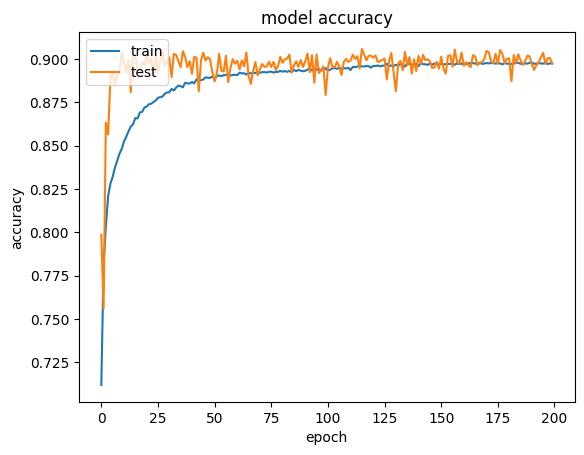

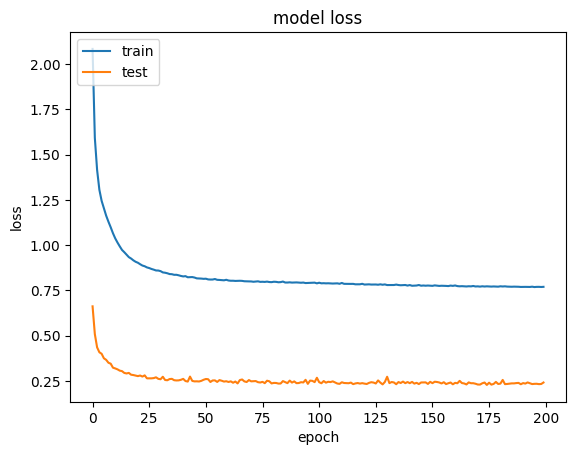

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.8974535647141043
Precision::  0.8974535647141043
Recall::  0.8974535647141043
F1_Score::  0.8974535647141043

Macro precision_recall_fscore_support (macro) average
(0.6410570117843037, 0.6622697881230892, 0.6220692879465112, None)

Macro precision_recall_fscore_support (micro) average
(0.8974535647141043, 0.8974535647141043, 0.8974535647141043, None)

Macro precision_recall_fscore_support (weighted) average
(0.9126271837080732, 0.8974535647141043, 0.9005902279232213, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.77      0.77      2404
            DDoS_HTTP       0.36      0.36      0.36      4984
            DDoS_ICMP       0.80      0.73      0.76     11643
             DDoS_TCP       0.99      1.00      1.00      5006
             DDoS_UDP       0.91      0.82      0.86     12157
       Fingerprinting       0.0

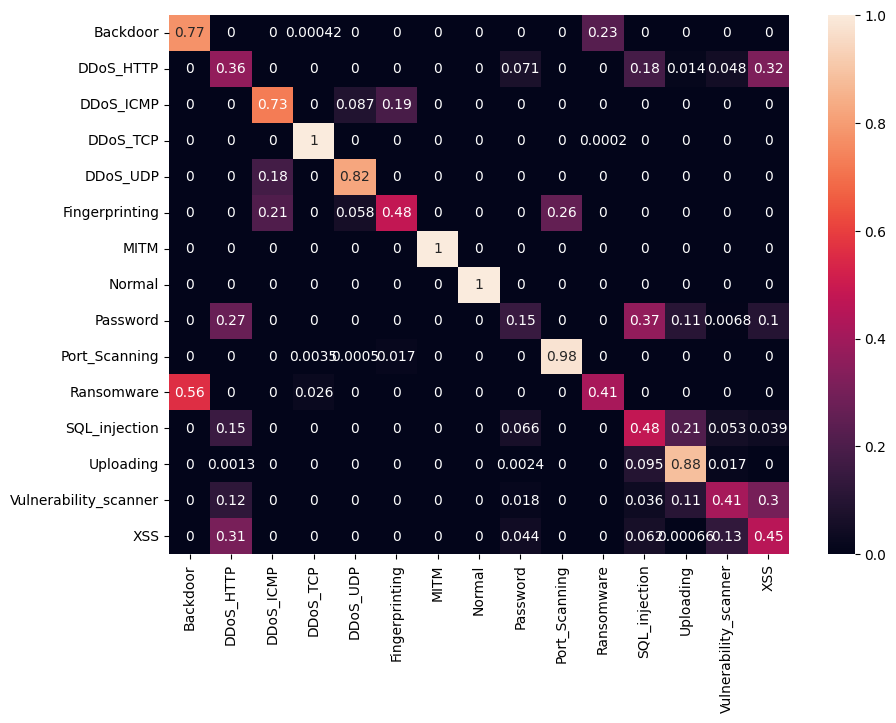

In [6]:
n_component = 3
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


#4F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
154/163 [===========================>..] - ETA: 0s - loss: 2.0974 - accuracy: 0.7497
Epoch 1: val_accuracy improved from -inf to 0.80132, saving model to EdgeIIoT_ica_4.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.0758 - accuracy: 0.7516 - val_loss: 0.7812 - val_accuracy: 0.8013
Epoch 2/200
 21/163 [==>...........................] - ETA: 0s - loss: 1.6672 - accuracy: 0.7710

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/163 [============================>.] - ETA: 0s - loss: 1.5636 - accuracy: 0.7921
Epoch 2: val_accuracy improved from 0.80132 to 0.84451, saving model to EdgeIIoT_ica_4.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5633 - accuracy: 0.7921 - val_loss: 0.4950 - val_accuracy: 0.8445
Epoch 3/200
163/163 [==============================] - ETA: 0s - loss: 1.3728 - accuracy: 0.8166
Epoch 3: val_accuracy improved from 0.84451 to 0.84536, saving model to EdgeIIoT_ica_4.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3728 - accuracy: 0.8166 - val_loss: 0.4345 - val_accuracy: 0.8454
Epoch 4/200
160/163 [============================>.] - ETA: 0s - loss: 1.2733 - accuracy: 0.8264
Epoch 4: val_accuracy improved from 0.84536 to 0.86835, saving model to EdgeIIoT_ica_4.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.2728 - accuracy: 0.8265 - val_loss: 0.4062 - val_accuracy: 0.8684
Epoch 5/200
162/163 [============================>.]

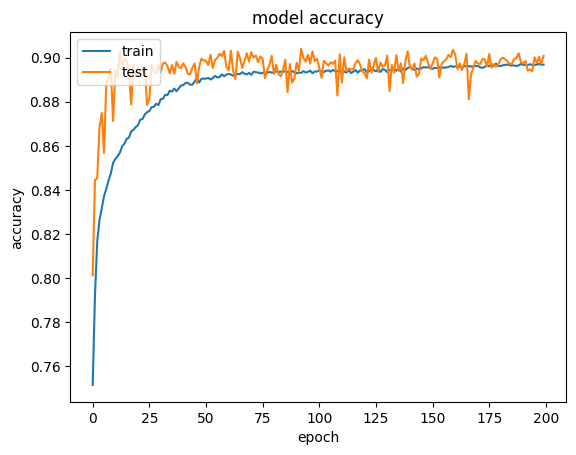

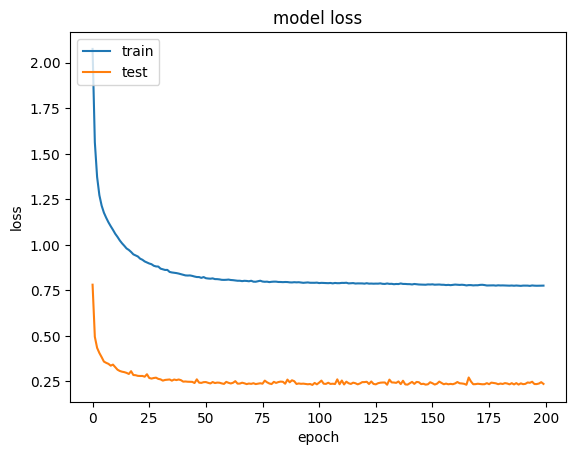

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.9012874902798421
Precision::  0.9012874902798421
Recall::  0.9012874902798421
F1_Score::  0.901287490279842

Macro precision_recall_fscore_support (macro) average
(0.6466067637899772, 0.6520547484121206, 0.6224689935839923, None)

Macro precision_recall_fscore_support (micro) average
(0.9012874902798421, 0.9012874902798421, 0.901287490279842, None)

Macro precision_recall_fscore_support (weighted) average
(0.9139237440846297, 0.9012874902798421, 0.9032014474621963, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.86      0.81      2404
            DDoS_HTTP       0.37      0.31      0.34      4984
            DDoS_ICMP       0.82      0.79      0.80     11643
             DDoS_TCP       1.00      1.00      1.00      5006
             DDoS_UDP       0.90      0.83      0.86     12157
       Fingerprinting       0.02 

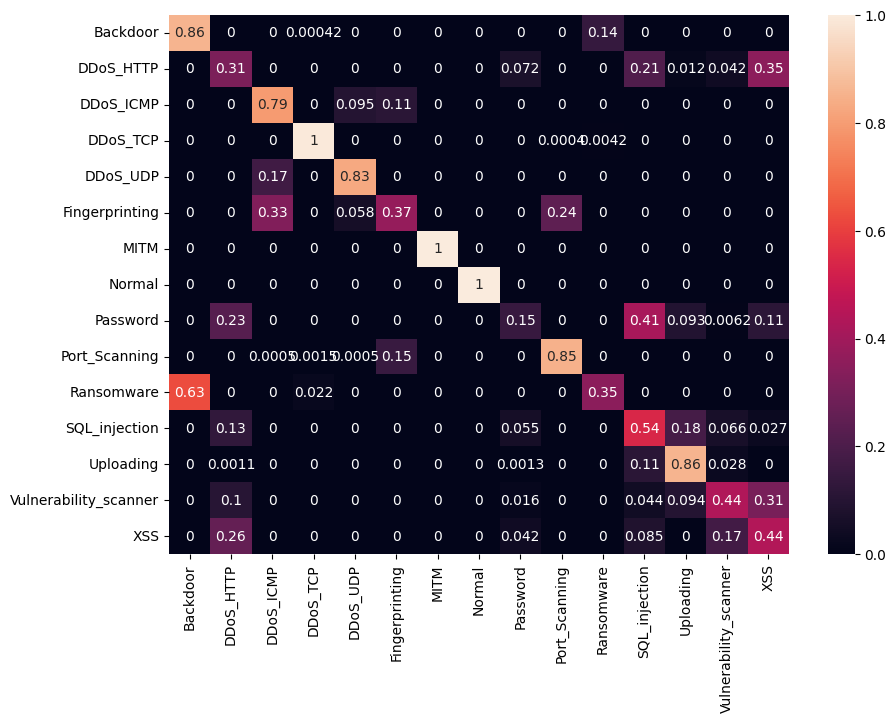

In [7]:
n_component = 4
XX_train = xxtr
XX_test = xxt
XX_val = xt
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


# 5F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
159/163 [============================>.] - ETA: 0s - loss: 2.0984 - accuracy: 0.6908
Epoch 1: val_accuracy improved from -inf to 0.80116, saving model to EdgeIIoT_ica_5.hdf5
163/163 [==============================] - 3s 7ms/step - loss: 2.0897 - accuracy: 0.6927 - val_loss: 0.8897 - val_accuracy: 0.8012
Epoch 2/200
 32/163 [====>.........................] - ETA: 0s - loss: 1.6390 - accuracy: 0.7809

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/163 [============================>.] - ETA: 0s - loss: 1.5724 - accuracy: 0.7809
Epoch 2: val_accuracy improved from 0.80116 to 0.81404, saving model to EdgeIIoT_ica_5.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5697 - accuracy: 0.7812 - val_loss: 0.4866 - val_accuracy: 0.8140
Epoch 3/200
163/163 [==============================] - ETA: 0s - loss: 1.3988 - accuracy: 0.8033
Epoch 3: val_accuracy improved from 0.81404 to 0.86869, saving model to EdgeIIoT_ica_5.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3988 - accuracy: 0.8033 - val_loss: 0.4393 - val_accuracy: 0.8687
Epoch 4/200
162/163 [============================>.] - ETA: 0s - loss: 1.3047 - accuracy: 0.8186
Epoch 4: val_accuracy did not improve from 0.86869
163/163 [==============================] - 1s 6ms/step - loss: 1.3047 - accuracy: 0.8186 - val_loss: 0.4240 - val_accuracy: 0.8567
Epoch 5/200
162/163 [============================>.] - ETA: 0s - loss: 1.2538 - accuracy: 0.8

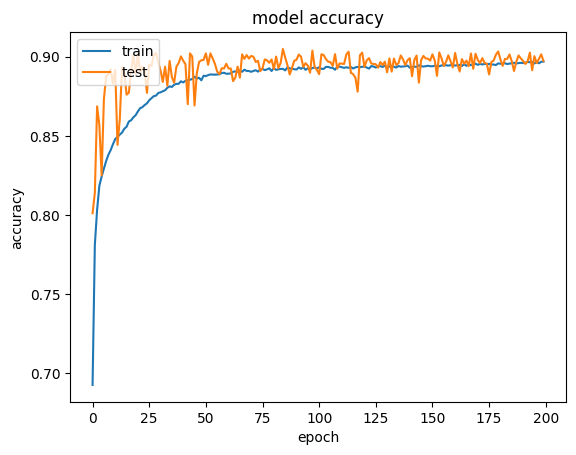

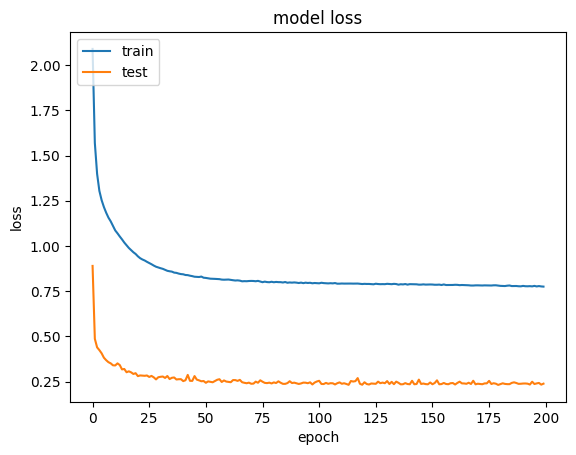

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.8977193310562736
Precision::  0.8977193310562736
Recall::  0.8977193310562736
F1_Score::  0.8977193310562736

Macro precision_recall_fscore_support (macro) average
(0.6467267049574967, 0.6480903112630421, 0.611912718203697, None)

Macro precision_recall_fscore_support (micro) average
(0.8977193310562736, 0.8977193310562736, 0.8977193310562736, None)

Macro precision_recall_fscore_support (weighted) average
(0.9152914925517948, 0.8977193310562736, 0.8997371206772948, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.75      0.76      2404
            DDoS_HTTP       0.35      0.30      0.32      4984
            DDoS_ICMP       0.84      0.75      0.80     11643
             DDoS_TCP       1.00      1.00      1.00      5006
             DDoS_UDP       0.87      0.87      0.87     12157
       Fingerprinting       0.02

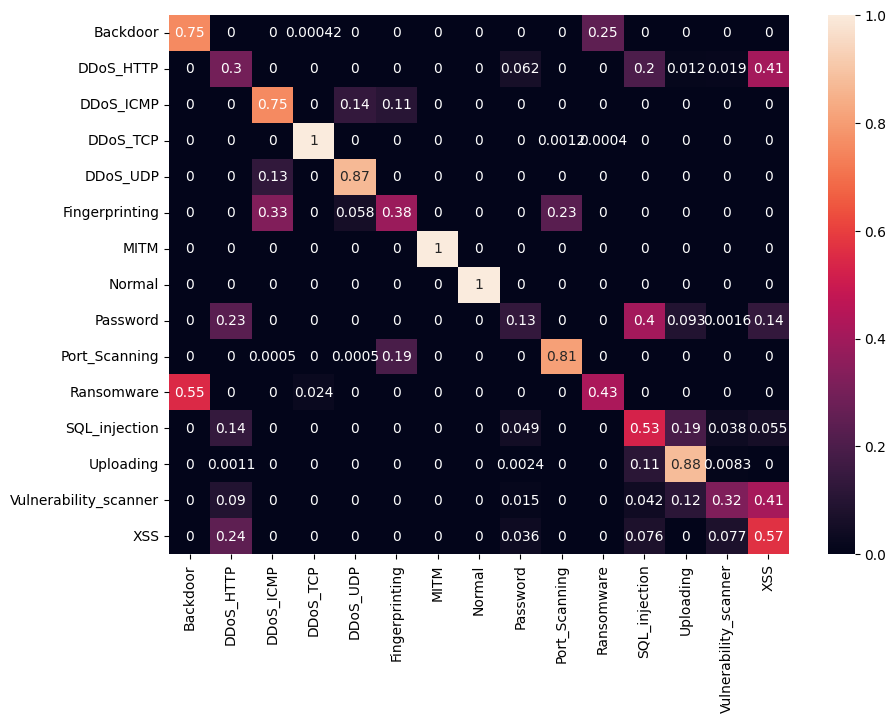

In [8]:
n_component = 5
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


#6F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
161/163 [============================>.] - ETA: 0s - loss: 2.0293 - accuracy: 0.7540
Epoch 1: val_accuracy improved from -inf to 0.80419, saving model to EdgeIIoT_ica_6.hdf5
163/163 [==============================] - 3s 9ms/step - loss: 2.0247 - accuracy: 0.7543 - val_loss: 0.5835 - val_accuracy: 0.8042
Epoch 2/200
 16/163 [=>............................] - ETA: 1s - loss: 1.6165 - accuracy: 0.7918

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/163 [===========================>..] - ETA: 0s - loss: 1.5251 - accuracy: 0.7951
Epoch 2: val_accuracy improved from 0.80419 to 0.84111, saving model to EdgeIIoT_ica_6.hdf5
163/163 [==============================] - 1s 8ms/step - loss: 1.5210 - accuracy: 0.7951 - val_loss: 0.4716 - val_accuracy: 0.8411
Epoch 3/200
157/163 [===========================>..] - ETA: 0s - loss: 1.3605 - accuracy: 0.8133
Epoch 3: val_accuracy improved from 0.84111 to 0.84481, saving model to EdgeIIoT_ica_6.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3587 - accuracy: 0.8135 - val_loss: 0.4246 - val_accuracy: 0.8448
Epoch 4/200
160/163 [============================>.] - ETA: 0s - loss: 1.2754 - accuracy: 0.8209
Epoch 4: val_accuracy improved from 0.84481 to 0.87514, saving model to EdgeIIoT_ica_6.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.2753 - accuracy: 0.8211 - val_loss: 0.4089 - val_accuracy: 0.8751
Epoch 5/200
156/163 [===========================>..]

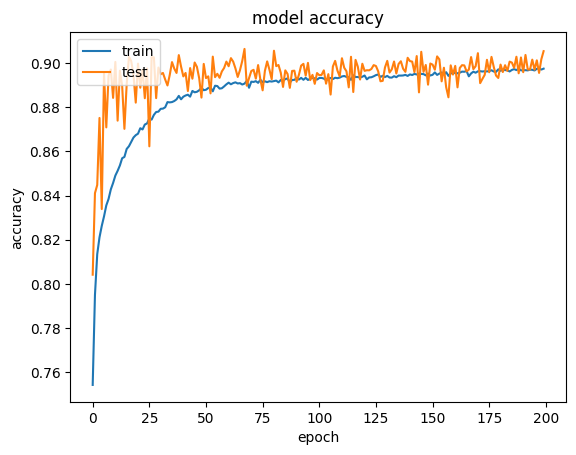

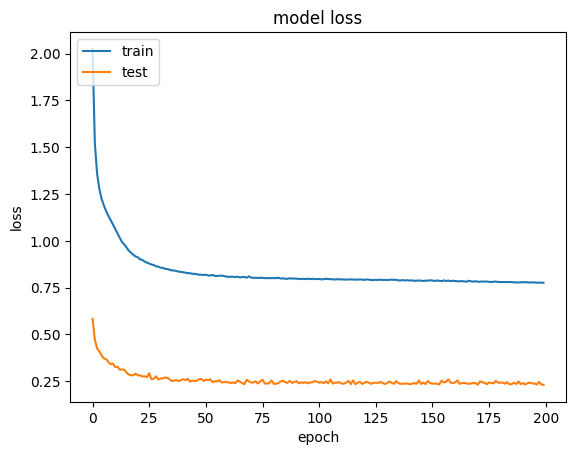

6350/6350 [==============================] - 12s 2ms/step
Accuracy:  0.9058498124870809
Precision::  0.9058498124870809
Recall::  0.9058498124870809
F1_Score::  0.9058498124870809

Macro precision_recall_fscore_support (macro) average
(0.6652955528503128, 0.6509404993570717, 0.6197186092725003, None)

Macro precision_recall_fscore_support (micro) average
(0.9058498124870809, 0.9058498124870809, 0.9058498124870809, None)

Macro precision_recall_fscore_support (weighted) average
(0.9232117670446189, 0.9058498124870809, 0.9033489527978019, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.64      0.70      2404
            DDoS_HTTP       0.38      0.37      0.38      4984
            DDoS_ICMP       0.84      0.84      0.84     11643
             DDoS_TCP       1.00      1.00      1.00      5006
             DDoS_UDP       0.89      0.85      0.87     12157
       Fingerprinting       0.0

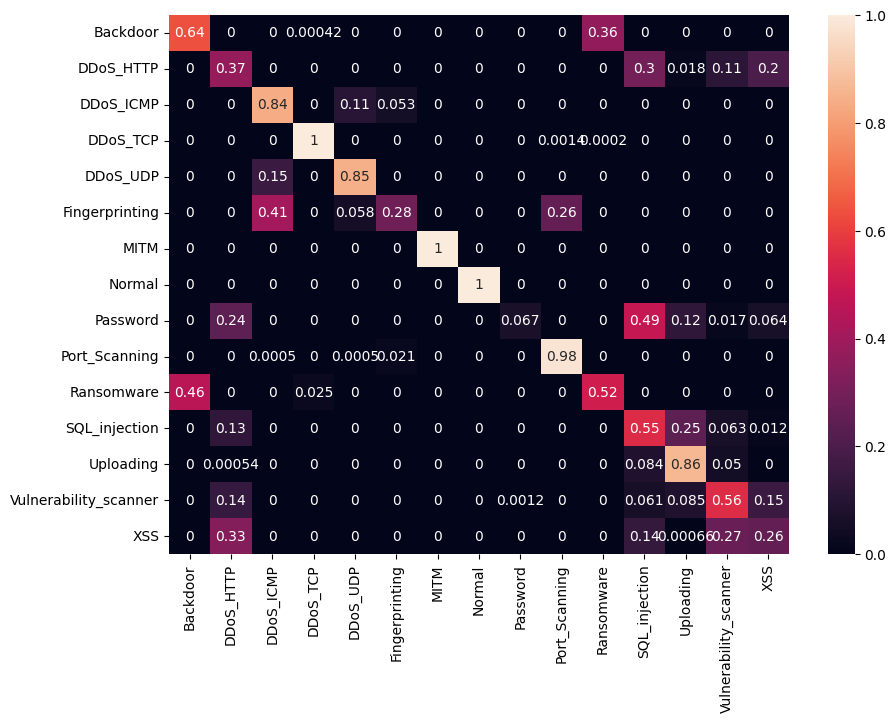

In [9]:
n_component = 6
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


# 7F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
162/163 [============================>.] - ETA: 0s - loss: 2.0701 - accuracy: 0.7294
Epoch 1: val_accuracy improved from -inf to 0.75701, saving model to EdgeIIoT_ica_7.hdf5
163/163 [==============================] - 3s 9ms/step - loss: 2.0688 - accuracy: 0.7296 - val_loss: 0.7161 - val_accuracy: 0.7570
Epoch 2/200
 18/163 [==>...........................] - ETA: 0s - loss: 1.6163 - accuracy: 0.7862

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - ETA: 0s - loss: 1.5293 - accuracy: 0.7916
Epoch 2: val_accuracy improved from 0.75701 to 0.82575, saving model to EdgeIIoT_ica_7.hdf5
163/163 [==============================] - 1s 8ms/step - loss: 1.5293 - accuracy: 0.7916 - val_loss: 0.4775 - val_accuracy: 0.8257
Epoch 3/200
156/163 [===========================>..] - ETA: 0s - loss: 1.3517 - accuracy: 0.8169
Epoch 3: val_accuracy improved from 0.82575 to 0.85030, saving model to EdgeIIoT_ica_7.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3512 - accuracy: 0.8171 - val_loss: 0.4311 - val_accuracy: 0.8503
Epoch 4/200
161/163 [============================>.] - ETA: 0s - loss: 1.2618 - accuracy: 0.8282
Epoch 4: val_accuracy improved from 0.85030 to 0.85932, saving model to EdgeIIoT_ica_7.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.2613 - accuracy: 0.8283 - val_loss: 0.3960 - val_accuracy: 0.8593
Epoch 5/200
156/163 [===========================>..]

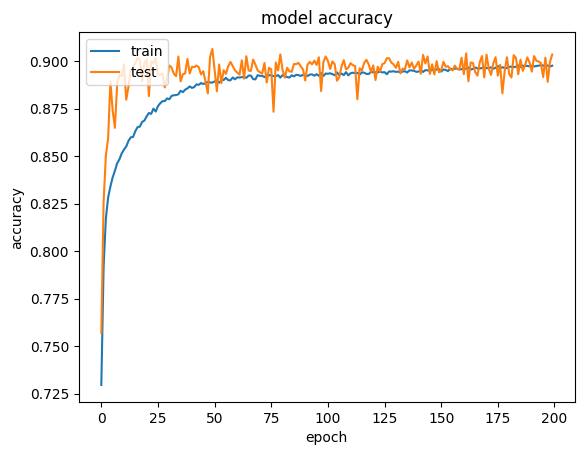

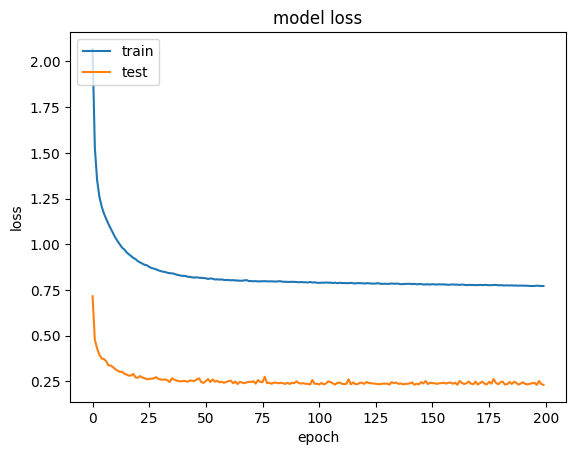

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.9039599184983217
Precision::  0.9039599184983217
Recall::  0.9039599184983217
F1_Score::  0.9039599184983217

Macro precision_recall_fscore_support (macro) average
(0.6394305336010214, 0.6466874386914142, 0.6248792719781698, None)

Macro precision_recall_fscore_support (micro) average
(0.9039599184983217, 0.9039599184983217, 0.9039599184983217, None)

Macro precision_recall_fscore_support (weighted) average
(0.9129743362188943, 0.9039599184983217, 0.9060172605895207, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.78      0.67      0.72      2404
            DDoS_HTTP       0.36      0.39      0.37      4984
            DDoS_ICMP       0.86      0.80      0.83     11643
             DDoS_TCP       1.00      1.00      1.00      5006
             DDoS_UDP       0.86      0.87      0.87     12157
       Fingerprinting       0.0

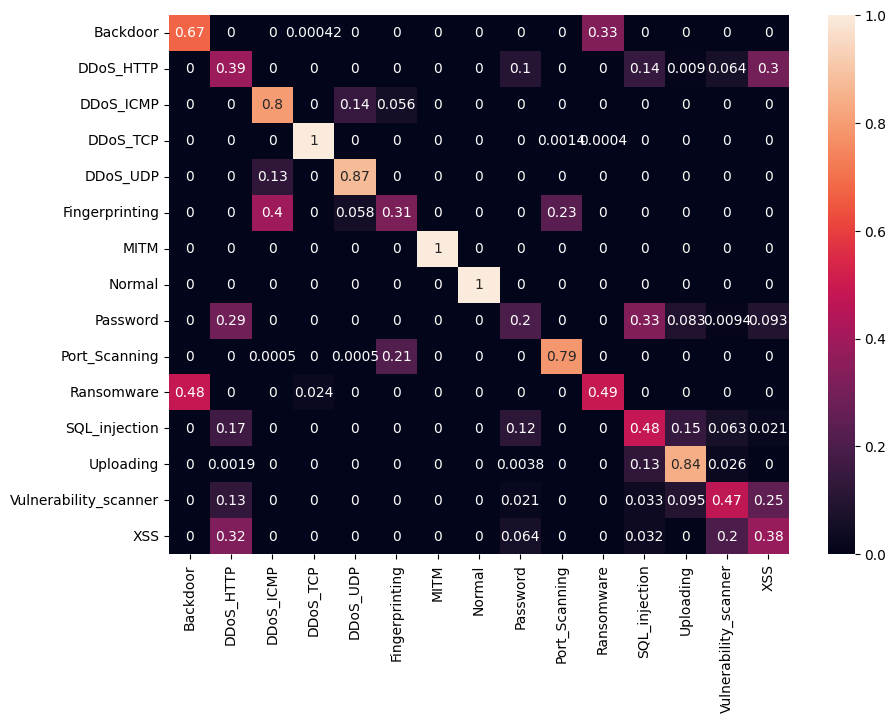

In [10]:
n_component = 7
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


# 8F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
163/163 [==============================] - ETA: 0s - loss: 2.0885 - accuracy: 0.7003
Epoch 1: val_accuracy improved from -inf to 0.80958, saving model to EdgeIIoT_ica_8.hdf5
163/163 [==============================] - 3s 7ms/step - loss: 2.0885 - accuracy: 0.7003 - val_loss: 0.7673 - val_accuracy: 0.8096
Epoch 2/200
 23/163 [===>..........................] - ETA: 0s - loss: 1.6801 - accuracy: 0.7735

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/163 [===========================>..] - ETA: 0s - loss: 1.5739 - accuracy: 0.7915
Epoch 2: val_accuracy did not improve from 0.80958
163/163 [==============================] - 1s 5ms/step - loss: 1.5685 - accuracy: 0.7917 - val_loss: 0.4932 - val_accuracy: 0.7952
Epoch 3/200
157/163 [===========================>..] - ETA: 0s - loss: 1.3827 - accuracy: 0.8121
Epoch 3: val_accuracy improved from 0.80958 to 0.83066, saving model to EdgeIIoT_ica_8.hdf5
163/163 [==============================] - 1s 5ms/step - loss: 1.3811 - accuracy: 0.8121 - val_loss: 0.4399 - val_accuracy: 0.8307
Epoch 4/200
157/163 [===========================>..] - ETA: 0s - loss: 1.2858 - accuracy: 0.8212
Epoch 4: val_accuracy did not improve from 0.83066
163/163 [==============================] - 1s 5ms/step - loss: 1.2868 - accuracy: 0.8206 - val_loss: 0.4307 - val_accuracy: 0.7891
Epoch 5/200
156/163 [===========================>..] - ETA: 0s - loss: 1.2395 - accuracy: 0.8252
Epoch 5: val_accuracy improved from 0

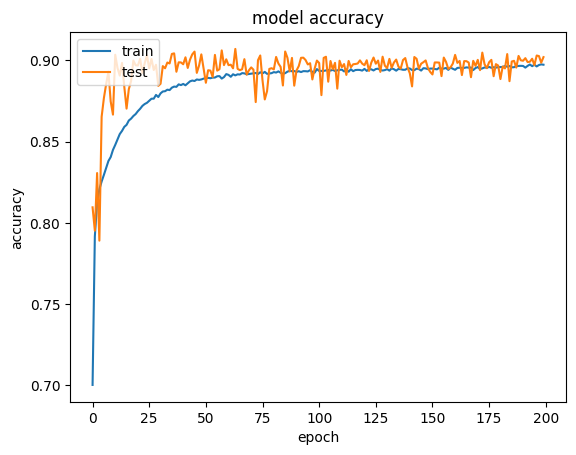

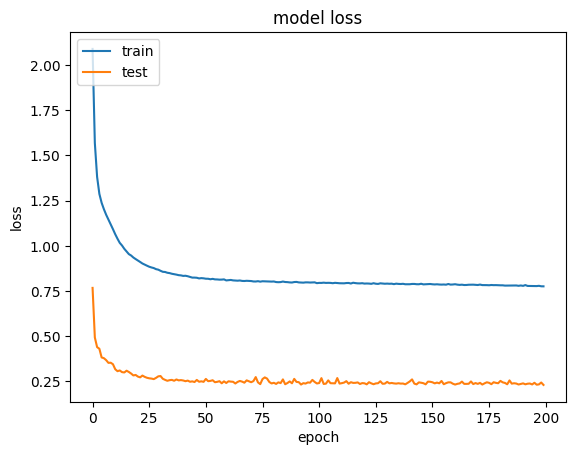

6350/6350 [==============================] - 12s 2ms/step
Accuracy:  0.9021536916913567
Precision::  0.9021536916913567
Recall::  0.9021536916913567
F1_Score::  0.9021536916913567

Macro precision_recall_fscore_support (macro) average
(0.6316208968112919, 0.6438634532119711, 0.6226910629564467, None)

Macro precision_recall_fscore_support (micro) average
(0.9021536916913567, 0.9021536916913567, 0.9021536916913567, None)

Macro precision_recall_fscore_support (weighted) average
(0.9093945503188948, 0.9021536916913567, 0.9034781462252853, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.67      0.72      2404
            DDoS_HTTP       0.38      0.28      0.32      4984
            DDoS_ICMP       0.87      0.75      0.81     11643
             DDoS_TCP       1.00      1.00      1.00      5006
             DDoS_UDP       0.82      0.90      0.86     12157
       Fingerprinting       0.0

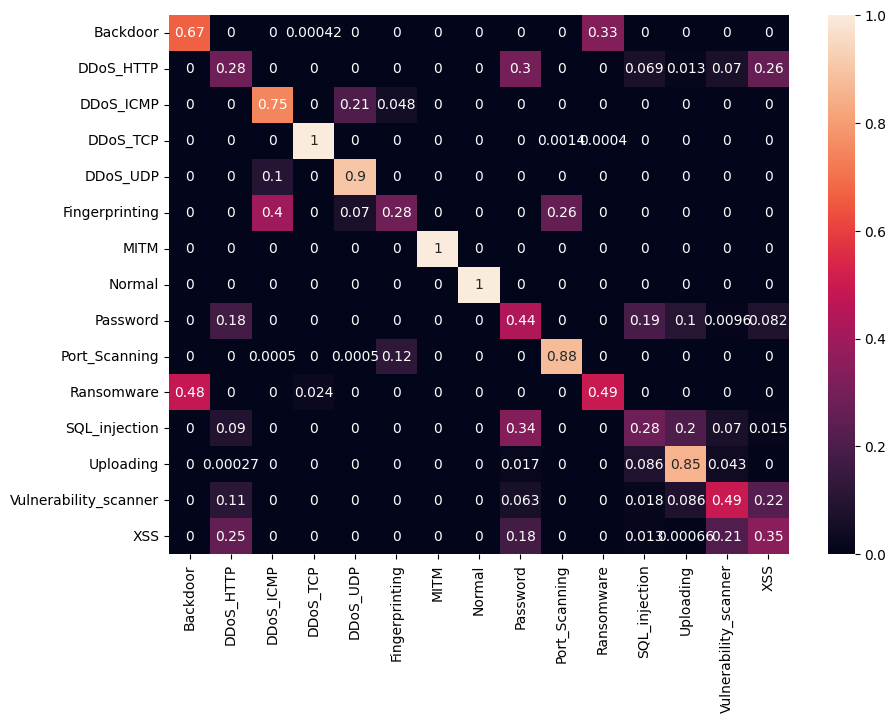

In [11]:
n_component = 8
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


# 9F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
159/163 [============================>.] - ETA: 0s - loss: 2.0775 - accuracy: 0.7142
Epoch 1: val_accuracy improved from -inf to 0.81469, saving model to EdgeIIoT_ica_9.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.0673 - accuracy: 0.7159 - val_loss: 0.6090 - val_accuracy: 0.8147
Epoch 2/200
 23/163 [===>..........................] - ETA: 0s - loss: 1.6097 - accuracy: 0.7910

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/163 [============================>.] - ETA: 0s - loss: 1.5526 - accuracy: 0.7901
Epoch 2: val_accuracy did not improve from 0.81469
163/163 [==============================] - 1s 5ms/step - loss: 1.5511 - accuracy: 0.7898 - val_loss: 0.4961 - val_accuracy: 0.7382
Epoch 3/200
158/163 [============================>.] - ETA: 0s - loss: 1.3886 - accuracy: 0.8104
Epoch 3: val_accuracy improved from 0.81469 to 0.87189, saving model to EdgeIIoT_ica_9.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3857 - accuracy: 0.8106 - val_loss: 0.4389 - val_accuracy: 0.8719
Epoch 4/200
162/163 [============================>.] - ETA: 0s - loss: 1.2896 - accuracy: 0.8202
Epoch 4: val_accuracy improved from 0.87189 to 0.87221, saving model to EdgeIIoT_ica_9.hdf5
163/163 [==============================] - 1s 5ms/step - loss: 1.2896 - accuracy: 0.8203 - val_loss: 0.4045 - val_accuracy: 0.8722
Epoch 5/200
163/163 [==============================] - ETA: 0s - loss: 1.2315 - accuracy: 0.8

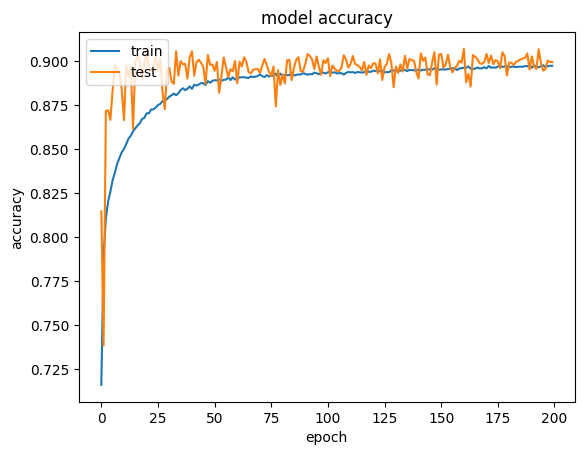

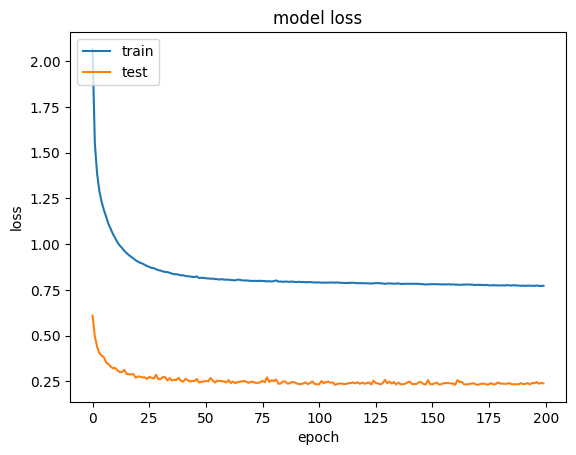

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.89988483458506
Precision::  0.89988483458506
Recall::  0.89988483458506
F1_Score::  0.89988483458506

Macro precision_recall_fscore_support (macro) average
(0.6599127051378051, 0.6584018551402273, 0.617984009297239, None)

Macro precision_recall_fscore_support (micro) average
(0.89988483458506, 0.89988483458506, 0.89988483458506, None)

Macro precision_recall_fscore_support (weighted) average
(0.9200696239714832, 0.89988483458506, 0.9005293869996754, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.78      0.78      2404
            DDoS_HTTP       0.34      0.35      0.34      4984
            DDoS_ICMP       0.83      0.78      0.81     11643
             DDoS_TCP       1.00      1.00      1.00      5006
             DDoS_UDP       0.88      0.85      0.87     12157
       Fingerprinting       0.02      0.36      

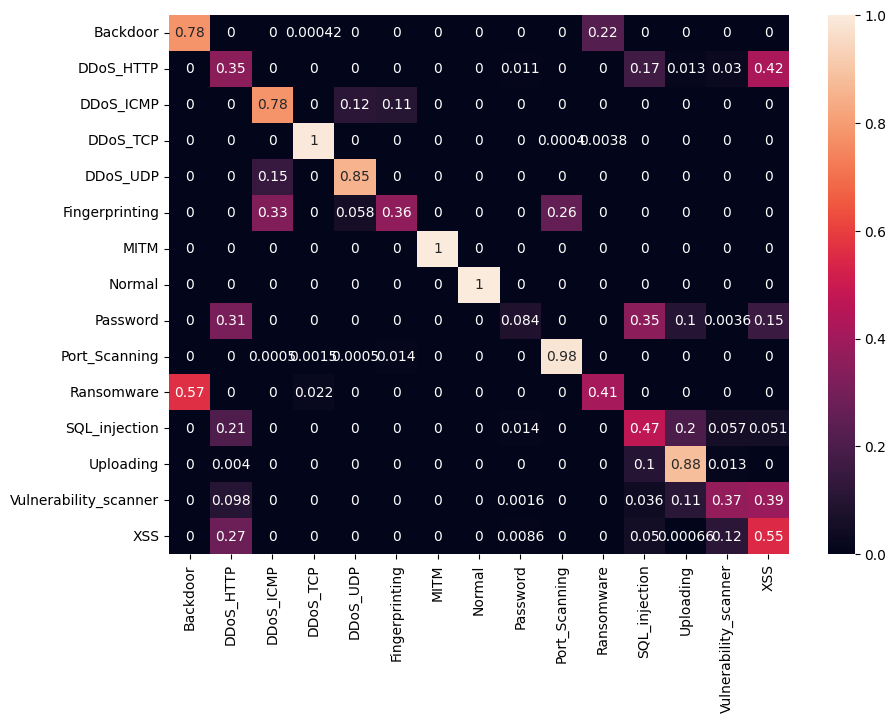

In [12]:
n_component = 9
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


# 10F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
158/163 [============================>.] - ETA: 0s - loss: 2.0875 - accuracy: 0.7096
Epoch 1: val_accuracy improved from -inf to 0.79409, saving model to EdgeIIoT_ica_10.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.0760 - accuracy: 0.7117 - val_loss: 0.8554 - val_accuracy: 0.7941
Epoch 2/200
 34/163 [=====>........................] - ETA: 0s - loss: 1.6321 - accuracy: 0.7840

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/163 [===========================>..] - ETA: 0s - loss: 1.5542 - accuracy: 0.7883
Epoch 2: val_accuracy improved from 0.79409 to 0.81783, saving model to EdgeIIoT_ica_10.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5503 - accuracy: 0.7890 - val_loss: 0.4777 - val_accuracy: 0.8178
Epoch 3/200
161/163 [============================>.] - ETA: 0s - loss: 1.3753 - accuracy: 0.8102
Epoch 3: val_accuracy improved from 0.81783 to 0.82576, saving model to EdgeIIoT_ica_10.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3750 - accuracy: 0.8102 - val_loss: 0.4365 - val_accuracy: 0.8258
Epoch 4/200
161/163 [============================>.] - ETA: 0s - loss: 1.2865 - accuracy: 0.8186
Epoch 4: val_accuracy improved from 0.82576 to 0.83731, saving model to EdgeIIoT_ica_10.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.2857 - accuracy: 0.8186 - val_loss: 0.4034 - val_accuracy: 0.8373
Epoch 5/200
154/163 [===========================>

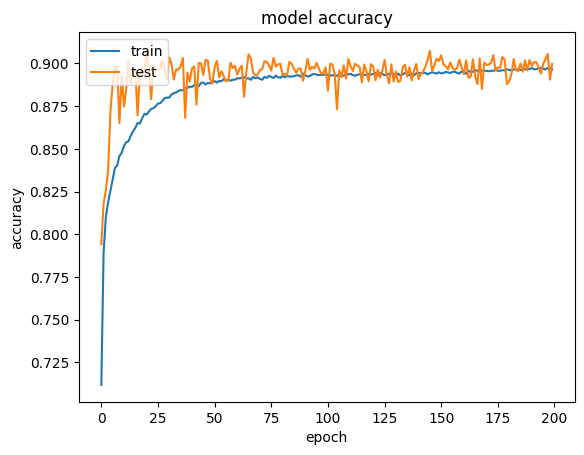

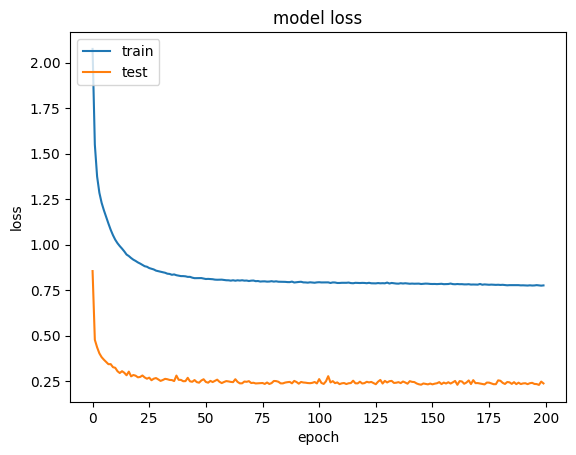

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.9000275609540027
Precision::  0.9000275609540027
Recall::  0.9000275609540027
F1_Score::  0.9000275609540028

Macro precision_recall_fscore_support (macro) average
(0.6740692018979204, 0.6555750848044677, 0.6175855108673995, None)

Macro precision_recall_fscore_support (micro) average
(0.9000275609540027, 0.9000275609540027, 0.9000275609540028, None)

Macro precision_recall_fscore_support (weighted) average
(0.925410320510366, 0.9000275609540027, 0.9005612021218196, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.73      0.75      2404
            DDoS_HTTP       0.36      0.41      0.38      4984
            DDoS_ICMP       0.84      0.73      0.78     11643
             DDoS_TCP       0.99      1.00      1.00      5006
             DDoS_UDP       0.87      0.87      0.87     12157
       Fingerprinting       0.02

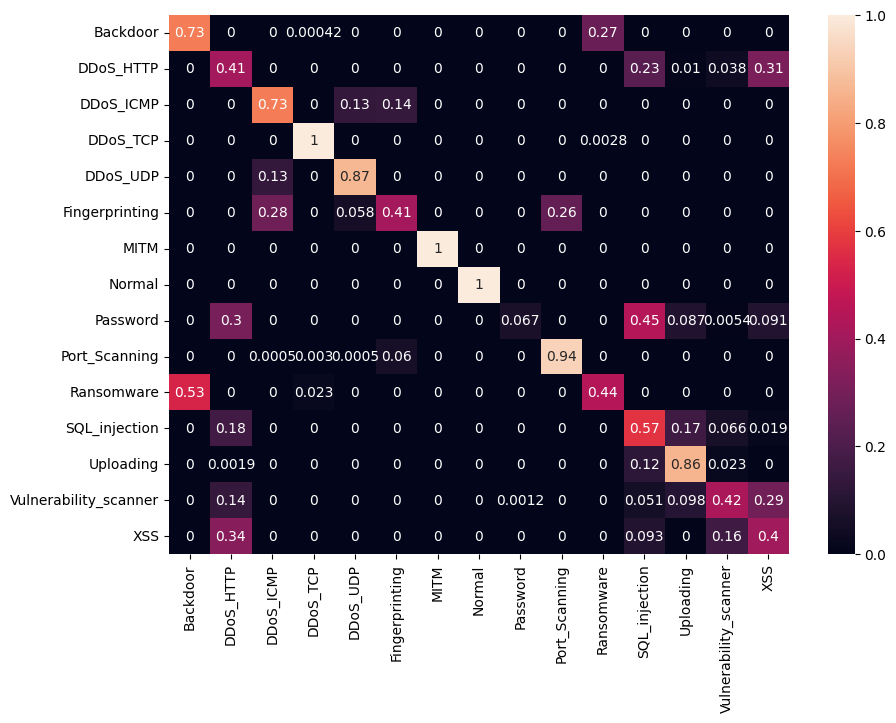

In [13]:
n_component = 10
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


# 11F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
159/163 [============================>.] - ETA: 0s - loss: 2.0601 - accuracy: 0.5486
Epoch 1: val_accuracy improved from -inf to 0.77820, saving model to EdgeIIoT_ica_11.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.0522 - accuracy: 0.5538 - val_loss: 0.9227 - val_accuracy: 0.7782
Epoch 2/200
 23/163 [===>..........................] - ETA: 0s - loss: 1.6530 - accuracy: 0.7731

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/163 [===========================>..] - ETA: 0s - loss: 1.5306 - accuracy: 0.7951
Epoch 2: val_accuracy improved from 0.77820 to 0.81910, saving model to EdgeIIoT_ica_11.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5277 - accuracy: 0.7956 - val_loss: 0.4861 - val_accuracy: 0.8191
Epoch 3/200
158/163 [============================>.] - ETA: 0s - loss: 1.3590 - accuracy: 0.8130
Epoch 3: val_accuracy improved from 0.81910 to 0.85149, saving model to EdgeIIoT_ica_11.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3579 - accuracy: 0.8131 - val_loss: 0.4294 - val_accuracy: 0.8515
Epoch 4/200
162/163 [============================>.] - ETA: 0s - loss: 1.2740 - accuracy: 0.8228
Epoch 4: val_accuracy improved from 0.85149 to 0.86627, saving model to EdgeIIoT_ica_11.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.2742 - accuracy: 0.8228 - val_loss: 0.4008 - val_accuracy: 0.8663
Epoch 5/200
156/163 [===========================>

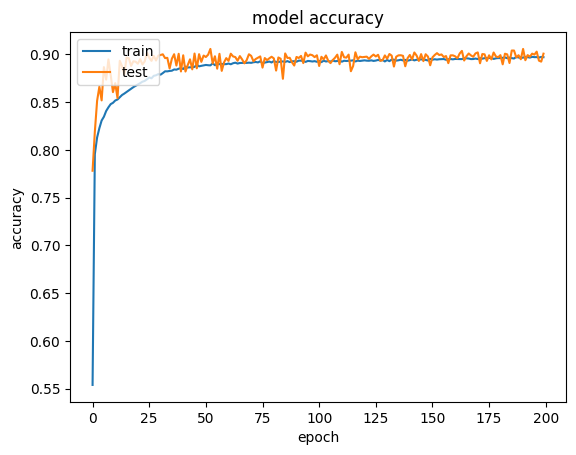

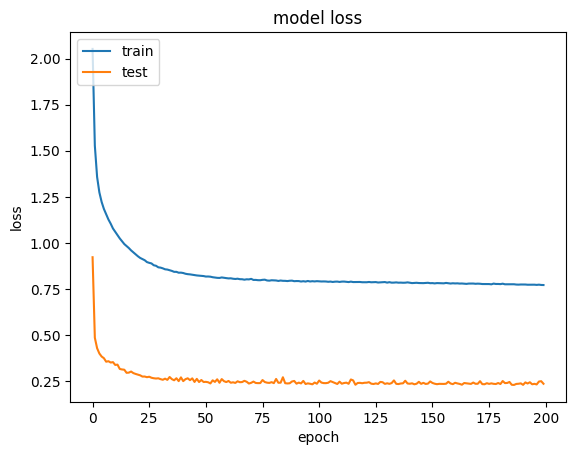

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.9013563926648489
Precision::  0.9013563926648489
Recall::  0.9013563926648489
F1_Score::  0.9013563926648489

Macro precision_recall_fscore_support (macro) average
(0.6495952525614855, 0.6568847491031637, 0.624692818026663, None)

Macro precision_recall_fscore_support (micro) average
(0.9013563926648489, 0.9013563926648489, 0.9013563926648489, None)

Macro precision_recall_fscore_support (weighted) average
(0.9146723407346604, 0.9013563926648489, 0.9027940883948742, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.84      0.81      2404
            DDoS_HTTP       0.36      0.40      0.38      4984
            DDoS_ICMP       0.84      0.73      0.78     11643
             DDoS_TCP       0.99      1.00      1.00      5006
             DDoS_UDP       0.88      0.87      0.87     12157
       Fingerprinting       0.02

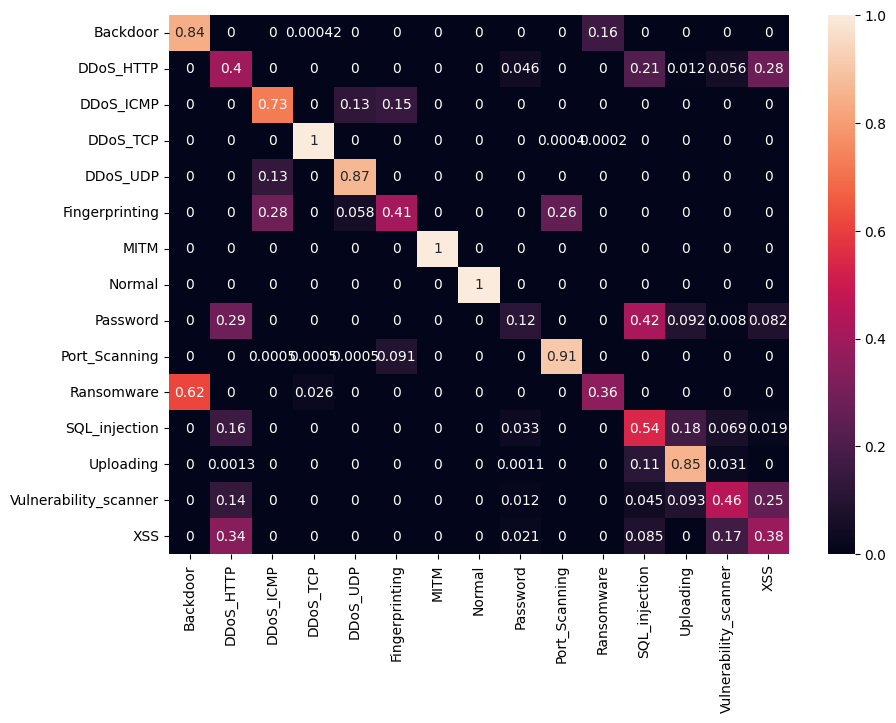

In [14]:
n_component = 11
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


#12F

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
161/163 [============================>.] - ETA: 0s - loss: 2.0612 - accuracy: 0.6786
Epoch 1: val_accuracy improved from -inf to 0.79441, saving model to EdgeIIoT_ica_12.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.0588 - accuracy: 0.6798 - val_loss: 0.9435 - val_accuracy: 0.7944
Epoch 2/200
 29/163 [====>.........................] - ETA: 0s - loss: 1.6504 - accuracy: 0.7888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


160/163 [============================>.] - ETA: 0s - loss: 1.5556 - accuracy: 0.7965
Epoch 2: val_accuracy improved from 0.79441 to 0.81216, saving model to EdgeIIoT_ica_12.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5528 - accuracy: 0.7966 - val_loss: 0.4805 - val_accuracy: 0.8122
Epoch 3/200
155/163 [===========================>..] - ETA: 0s - loss: 1.3841 - accuracy: 0.8120
Epoch 3: val_accuracy improved from 0.81216 to 0.83891, saving model to EdgeIIoT_ica_12.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3808 - accuracy: 0.8114 - val_loss: 0.4316 - val_accuracy: 0.8389
Epoch 4/200
156/163 [===========================>..] - ETA: 0s - loss: 1.2932 - accuracy: 0.8218
Epoch 4: val_accuracy did not improve from 0.83891
163/163 [==============================] - 1s 5ms/step - loss: 1.2918 - accuracy: 0.8213 - val_loss: 0.4102 - val_accuracy: 0.8277
Epoch 5/200
163/163 [==============================] - ETA: 0s - loss: 1.2415 - accuracy: 0

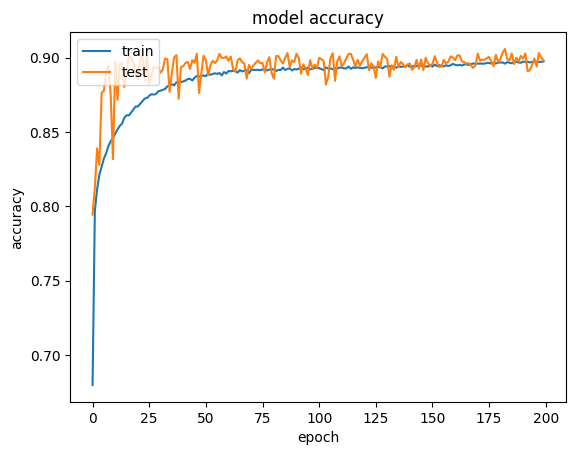

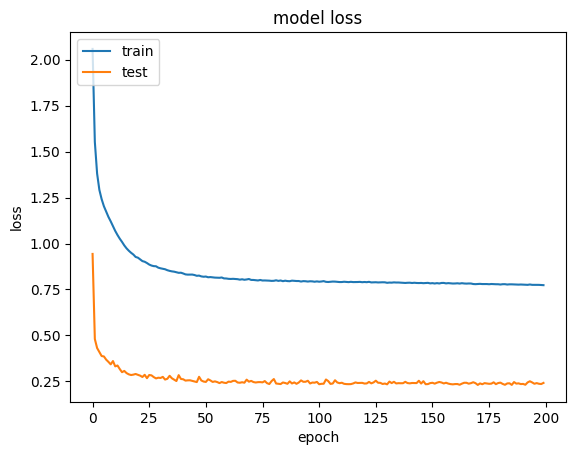

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.8989349659917514
Precision::  0.8989349659917514
Recall::  0.8989349659917514
F1_Score::  0.8989349659917514

Macro precision_recall_fscore_support (macro) average
(0.6427254990642715, 0.6618642902926216, 0.6249593865350268, None)

Macro precision_recall_fscore_support (micro) average
(0.8989349659917514, 0.8989349659917514, 0.8989349659917514, None)

Macro precision_recall_fscore_support (weighted) average
(0.9129919507985061, 0.8989349659917514, 0.9021656830996143, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.80      0.79      2404
            DDoS_HTTP       0.36      0.27      0.31      4984
            DDoS_ICMP       0.80      0.74      0.77     11643
             DDoS_TCP       0.99      0.99      0.99      5006
             DDoS_UDP       0.91      0.82      0.86     12157
       Fingerprinting       0.0

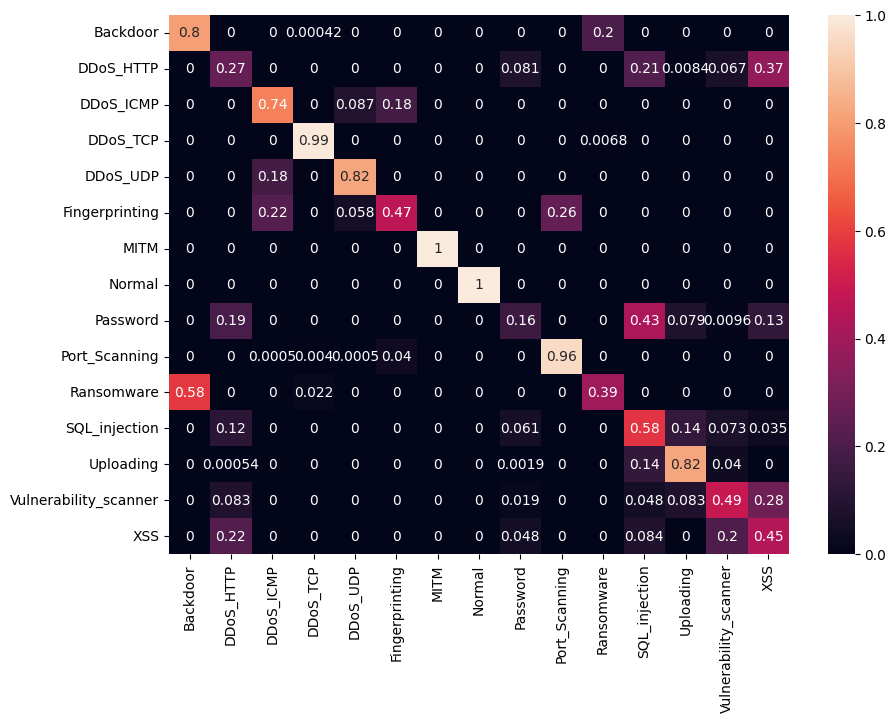

In [15]:
n_component = 12
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


#13f

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
154/163 [===========================>..] - ETA: 0s - loss: 2.0865 - accuracy: 0.7479
Epoch 1: val_accuracy improved from -inf to 0.79825, saving model to EdgeIIoT_ica_13.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.0646 - accuracy: 0.7500 - val_loss: 0.6590 - val_accuracy: 0.7983
Epoch 2/200
 24/163 [===>..........................] - ETA: 0s - loss: 1.6477 - accuracy: 0.7841

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/163 [===========================>..] - ETA: 0s - loss: 1.5553 - accuracy: 0.7897
Epoch 2: val_accuracy improved from 0.79825 to 0.80510, saving model to EdgeIIoT_ica_13.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5520 - accuracy: 0.7901 - val_loss: 0.4808 - val_accuracy: 0.8051
Epoch 3/200
162/163 [============================>.] - ETA: 0s - loss: 1.3828 - accuracy: 0.8120
Epoch 3: val_accuracy improved from 0.80510 to 0.83645, saving model to EdgeIIoT_ica_13.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3831 - accuracy: 0.8120 - val_loss: 0.4421 - val_accuracy: 0.8365
Epoch 4/200
160/163 [============================>.] - ETA: 0s - loss: 1.2942 - accuracy: 0.8195
Epoch 4: val_accuracy improved from 0.83645 to 0.87966, saving model to EdgeIIoT_ica_13.hdf5
163/163 [==============================] - 1s 5ms/step - loss: 1.2932 - accuracy: 0.8196 - val_loss: 0.4141 - val_accuracy: 0.8797
Epoch 5/200
155/163 [===========================>

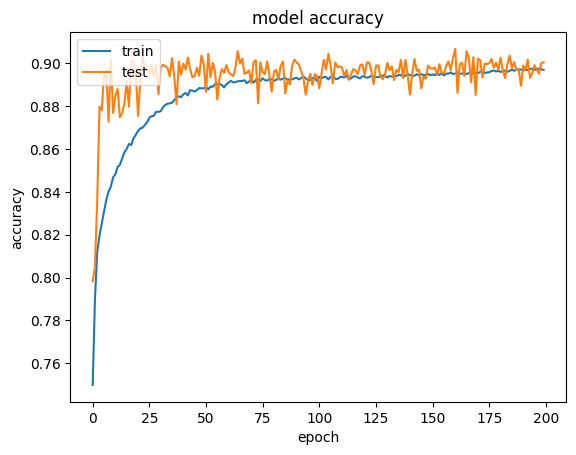

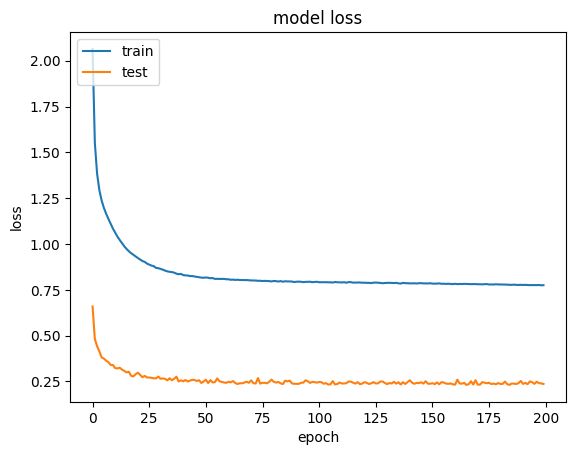

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.9008150167826523
Precision::  0.9008150167826523
Recall::  0.9008150167826523
F1_Score::  0.9008150167826523

Macro precision_recall_fscore_support (macro) average
(0.6735768116133145, 0.6560311353408583, 0.6177383812831698, None)

Macro precision_recall_fscore_support (micro) average
(0.9008150167826523, 0.9008150167826523, 0.9008150167826523, None)

Macro precision_recall_fscore_support (weighted) average
(0.9250106035183815, 0.9008150167826523, 0.9005234978623917, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.77      0.77      2404
            DDoS_HTTP       0.37      0.34      0.36      4984
            DDoS_ICMP       0.83      0.75      0.79     11643
             DDoS_TCP       1.00      1.00      1.00      5006
             DDoS_UDP       0.88      0.86      0.87     12157
       Fingerprinting       0.0

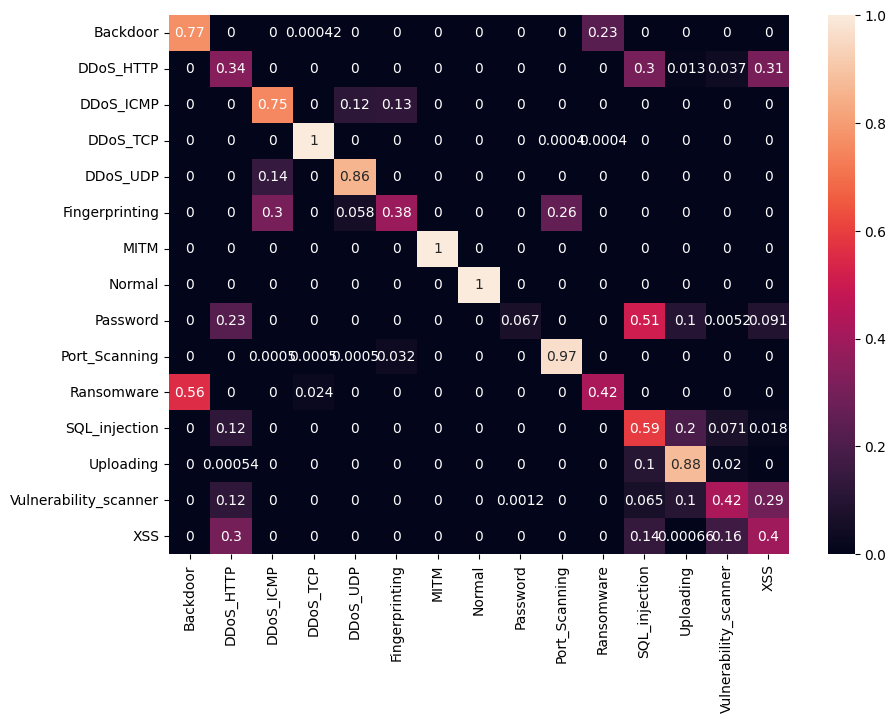

In [16]:
n_component = 13
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


# 14f

(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
155/163 [===========================>..] - ETA: 0s - loss: 2.1283 - accuracy: 0.5297
Epoch 1: val_accuracy improved from -inf to 0.77775, saving model to EdgeIIoT_ica_14.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.1075 - accuracy: 0.5411 - val_loss: 0.8019 - val_accuracy: 0.7777
Epoch 2/200
 32/163 [====>.........................] - ETA: 0s - loss: 1.6997 - accuracy: 0.7720

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


154/163 [===========================>..] - ETA: 0s - loss: 1.6046 - accuracy: 0.7792
Epoch 2: val_accuracy improved from 0.77775 to 0.82529, saving model to EdgeIIoT_ica_14.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5982 - accuracy: 0.7805 - val_loss: 0.4918 - val_accuracy: 0.8253
Epoch 3/200
154/163 [===========================>..] - ETA: 0s - loss: 1.3851 - accuracy: 0.8112
Epoch 3: val_accuracy improved from 0.82529 to 0.85427, saving model to EdgeIIoT_ica_14.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3807 - accuracy: 0.8120 - val_loss: 0.4278 - val_accuracy: 0.8543
Epoch 4/200
155/163 [===========================>..] - ETA: 0s - loss: 1.2783 - accuracy: 0.8236
Epoch 4: val_accuracy did not improve from 0.85427
163/163 [==============================] - 1s 5ms/step - loss: 1.2752 - accuracy: 0.8239 - val_loss: 0.3964 - val_accuracy: 0.8540
Epoch 5/200
158/163 [============================>.] - ETA: 0s - loss: 1.2188 - accuracy: 0

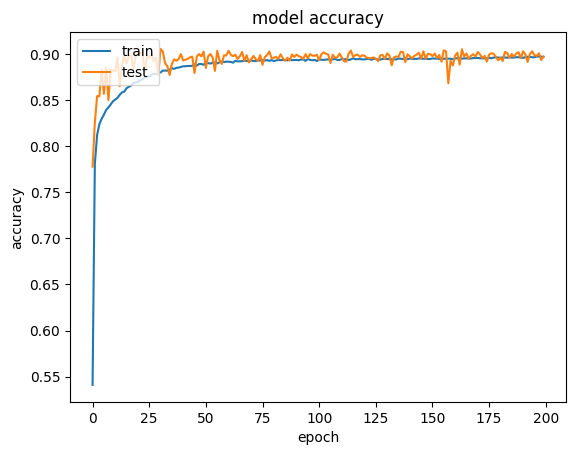

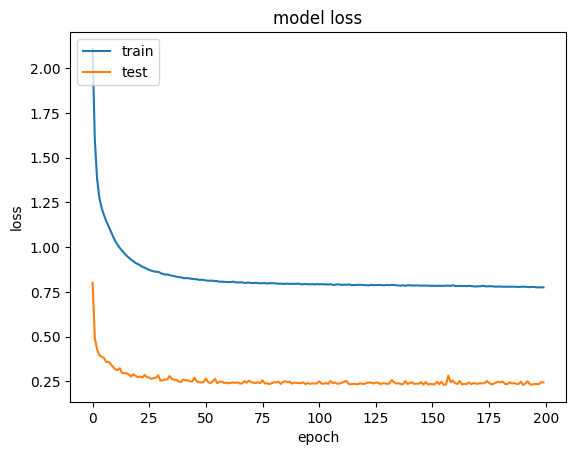

6350/6350 [==============================] - 11s 2ms/step
Accuracy:  0.897182876773006
Precision::  0.897182876773006
Recall::  0.897182876773006
F1_Score::  0.897182876773006

Macro precision_recall_fscore_support (macro) average
(0.642221909197594, 0.6583612132290118, 0.6224286679613188, None)

Macro precision_recall_fscore_support (micro) average
(0.897182876773006, 0.897182876773006, 0.897182876773006, None)

Macro precision_recall_fscore_support (weighted) average
(0.9118842621304071, 0.897182876773006, 0.9009118401552948, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       0.77      0.86      0.81      2404
            DDoS_HTTP       0.36      0.35      0.35      4984
            DDoS_ICMP       0.78      0.73      0.76     11643
             DDoS_TCP       0.99      1.00      1.00      5006
             DDoS_UDP       0.92      0.81      0.86     12157
       Fingerprinting       0.02      0.

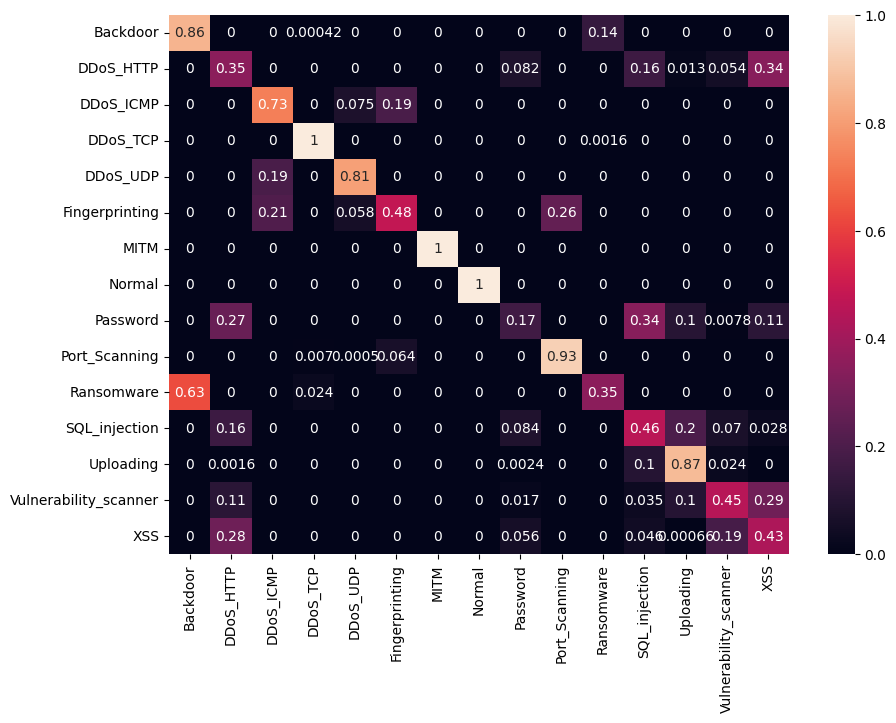

In [17]:
n_component = 14
XX_train = xxtr
XX_test = xxt
XX_val = xt

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)


15F

In [18]:
n_component = 15
XX_train = xxtr
XX_test = xxt
XX_val = xt
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=n_component, random_state=10)
X_train = fa.fit_transform(XX_train)
X_test = fa.transform(XX_test)
X_val = fa.transform(XX_val)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
print(Y_val.shape)

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dropout, Activation, Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from datetime import datetime
from keras.regularizers import l2 as l2
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(32,activation='gelu'))
model.add(Dropout(0.02))

model.add(Dense(15, activation='softmax'))
op = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

import time
start = time.time()
print('program start...')

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='EdgeIIoT_ica_'+str(n_component)+'.hdf5',
                                monitor='val_accuracy',
                                verbose=1,
                                mode ='max',
                                save_best_only=True)

history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200,
          batch_size = 10000,
          class_weight = class_weights,
          callbacks=[checkpointer])

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')


(1625484, 2)
(203186, 2)
(1625484,)
(203186,)
(203186,)
(203186,)
program start...
Epoch 1/200
157/163 [===========================>..] - ETA: 0s - loss: 2.0758 - accuracy: 0.7237
Epoch 1: val_accuracy improved from -inf to 0.78947, saving model to EdgeIIoT_ica_15.hdf5
163/163 [==============================] - 2s 7ms/step - loss: 2.0613 - accuracy: 0.7255 - val_loss: 0.6971 - val_accuracy: 0.7895
Epoch 2/200
 32/163 [====>.........................] - ETA: 0s - loss: 1.6117 - accuracy: 0.7879

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/163 [============================>.] - ETA: 0s - loss: 1.5440 - accuracy: 0.7902
Epoch 2: val_accuracy improved from 0.78947 to 0.80056, saving model to EdgeIIoT_ica_15.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.5430 - accuracy: 0.7903 - val_loss: 0.4757 - val_accuracy: 0.8006
Epoch 3/200
154/163 [===========================>..] - ETA: 0s - loss: 1.3767 - accuracy: 0.8075
Epoch 3: val_accuracy improved from 0.80056 to 0.83126, saving model to EdgeIIoT_ica_15.hdf5
163/163 [==============================] - 1s 6ms/step - loss: 1.3751 - accuracy: 0.8085 - val_loss: 0.4377 - val_accuracy: 0.8313
Epoch 4/200
157/163 [===========================>..] - ETA: 0s - loss: 1.2909 - accuracy: 0.8188
Epoch 4: val_accuracy did not improve from 0.83126
163/163 [==============================] - 1s 8ms/step - loss: 1.2904 - accuracy: 0.8190 - val_loss: 0.4063 - val_accuracy: 0.8192
Epoch 5/200
162/163 [============================>.] - ETA: 0s - loss: 1.2383 - accuracy: 0

In [ ]:
print(end - start, 'seconds')
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from  tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y_train))
YY_train = to_categorical(Y_train, num_classes=num_classes)
YY_test = to_categorical(Y_test, num_classes=num_classes)
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(YY_test, axis=1)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)
    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print(model.summary())
print_score(y_hat, y_true, label_encoder)